<img src='graphics/Text_EDA_2.jpeg'>

<img src='graphics/spacer.png'>

<center><font style="font-size:40px;">Text Exploratory Data Analysis (EDA), Part 2 </font></center>
<center>Prepared and coded by Ben P. Meredith, Ed.D.</center>

In our last session together, we began running an EDA on the text data we scraped from our Indeed web scraper in Meet-up 017 and cleaned in Meet-up 018. In this last session, we did the following:

1. Word Count per advertisement
1. Count of Word Frequency both in each advertisement and among all advertisements
1. Discussed and learned the removal of stop words
1. Coded Python to remove duplicate advertisements
1. Made Word Clouds to visualize the first parts of our EDA

In this session, we are going to continue text analysis with several techniques that delve us deeper into the realm of natural language processing and text manipulation. 

# Load Our Data

Let's kick off this session by loading our data. In the following block, load a copy of your saved csv from last time. There are two ways to do this.

1. You can copy and paste a copy of the csv file into the data folder for this meet-up by going to your computer's desktop and doing it by hand. Nothing wrong with this method. 
1. Bonus Challenge: Can you figure out how to navigate your `pd.read_csv()` statement to read directly from the data folder in your saved version of our last meet-up session?

## Method 1

In [16]:
# Method 1
import pandas as pd

df = pd.read_csv('data/data_scientist_job_search_processed.csv', index_col=0)

df.head()

,index,job_id,title,company,url,text,pull_date,clean_text,word_count,word_count_frequency,no_stop_text,proper_names,nouns,verbs,adjectives,adverbs,possessives,pronouns
0,0,jl_ef4f45eee0d53000,"Engineering Manager, Ads Machine Learning",Pinterest,https://www.indeed.com/viewjob?jk=ef4f45eee0d5...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,<p>About Pinterest:<p>\n<p>\nMillions of peopl...,239.0,"[('p', 12), ('pinterest', 5), ('their', 4), ('...",<p>about pinterest:<p>\n<p>\nmillions people a...,"{'science', 'millions', 'ph.d', 'pinterest', '...","{'background', 'plan', 'grow', 'industry', 'te...","{'make', 'upholds', 'help', 'matching', 'scali...","{'ll', 're', 'relevant', 'offsite', 'cross-fun...","{'better', 'forward', 'not'}","{'our', 'your', 'their'}","{'it', 'them', 'they', 'we', 'you'}"
1,1,jl_b0fe1a91ffb0e24d,Applied Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=b0fe1a91ffb0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"- MS or PhD degree in computer science, opera...",328.0,"[('experience', 5), ('learning', 5), ('you', 5...","ms phd degree computer science, operations re...","{'aws', 'action', '–', 'identity', 'disability...","{'decisions', 'understanding', 'systems', 'tra...","{'deploying', 'hire', 'written', 'achieving', ...","{'acclaimed', 'novel', 'reinforcement', 'algor...","{'particularly', 'closely', 'effectively'}","{'our', 'your', 'their', 'its'}",{'you'}
2,2,jl_900d5e7e57d3225e,Data Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=900d5e7e57d3...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- PhD or equivalent Master's Degree plus 4+ y...,382.0,"[('business', 7), ('experience', 6), ('you', 6...",phd equivalent master's degree plus 4+ years ...,"{'device', 'ring', 'sql', 'degree', 'kindle', ...","{'enhancements', 'systems', 'track', 'research...","{'researching', 'understanding', 'help', 'exis...","{'outstanding', 'scientific', 'best', 'end-to-...","{'closely', 'efficiently', 'well', 'conceptual...","{'our', 'their'}","{'you', 'we'}"
3,3,jl_a0de3ccca1e027a6,Sr Director of Data and Analytics,Equiscript,https://www.indeed.com/viewjob?jk=a0de3ccca1e0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"At Equiscript, we improve access to healthcare...",1199.0,"[('p', 112), ('data', 42), ('business', 15), (...","equiscript, we improve access healthcare commu...","{'culture', 'fastest', 'professional', 'visual...","{'culture', 'leadership', 'levels', 'understan...","{'challenging', 'facilitate', 'interpret', 'we...","{'data-driven', 'professional', 'occasional', ...","{'highly', 'and/or', 'closely', 'around', 'wel...","{'our', 'their', 'its'}","{'you', 'we'}"
4,4,jl_5d0204fe56e8daee,"ES Tech, Machine Learning Engineer",Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=5d0204fe56e8...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- Programming experience with at least one mo...,304.0,"[('experience', 9), ('learning', 5), ('as', 4)...",programming experience least one modern langu...,"{'science', 'aws', 'action', 'sql', 'deep', 'u...","{'science', 'map', 'bachelor', 'insights', 'sy...","{'distributed', 'challenging', 'help', 'expand...","{'successful', 'scientific', 'equal', 'related...","{'closely', 'most', 'as', 'well'}","{'our', 'its'}","{'they', 'you', 'we'}"


## Method 2

In [6]:
# Method 2 - particular to Ben's machine given how he stores data for Python Meet-ups
import pandas as pd

df = pd.read_csv('/Users/benmeredith/Desktop/Python Meet-up/019_Text_EDA_Part_1/data/data_scientist_job_search_processed.csv', index_col =0)

#These two lines are just to clean up our DataFrame in the event these columns appear.
# del df['Unnamed: 0']
del df['level_0'] 

df.head()

,index,job_id,title,company,url,text,pull_date,clean_text,token_text,word_count,word_count_frequency,no_stop_text
0,0,jl_ef4f45eee0d53000,"Engineering Manager, Ads Machine Learning",Pinterest,https://www.indeed.com/viewjob?jk=ef4f45eee0d5...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,About Pinterest:Millions of people across the ...,"['About', 'Pinterest', ':', 'Millions', 'of', ...",239.0,"[('pinterest', 5), ('their', 4), ('new', 3), (...",about pinterest:millions people across world c...
1,1,jl_b0fe1a91ffb0e24d,Applied Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=b0fe1a91ffb0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"- MS or PhD degree in computer science, opera...","['-', 'MS', 'or', 'PhD', 'degree', 'in', 'comp...",328.0,"[('experience', 5), ('learning', 5), ('you', 5...","ms phd degree computer science, operations re..."
2,2,jl_900d5e7e57d3225e,Data Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=900d5e7e57d3...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- PhD or equivalent Master's Degree plus 4+ y...,"['-', 'PhD', 'or', 'equivalent', 'Master', ""'s...",382.0,"[('business', 7), ('experience', 6), ('you', 6...",phd equivalent master's degree plus 4+ years ...
3,3,jl_a0de3ccca1e027a6,Sr Director of Data and Analytics,Equiscript,https://www.indeed.com/viewjob?jk=a0de3ccca1e0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"At Equiscript, we improve access to healthcare...","['At', 'Equiscript', ',', 'we', 'improve', 'ac...",1208.0,"[('data', 42), ('business', 15), ('company', 1...","equiscript, we improve access healthcare commu..."
4,4,jl_5d0204fe56e8daee,"ES Tech, Machine Learning Engineer",Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=5d0204fe56e8...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- Programming experience with at least one mo...,"['-', 'Programming', 'experience', 'with', 'at...",304.0,"[('experience', 9), ('learning', 5), ('as', 4)...",programming experience least one modern langu...


### Discussion

When might we want to use Method 2 over Method 1?


# Extract words by part of sentence/speech

Part of Sentence (POS) is the identification of the syntaxual position of a word within a sentence. It answers the questions, 
1. which word is the subject of the sentence? 
1. Which word is the verb? 
1. Which are the adverbs and adjectives? etc. 

## NLTK's pos_tag

I won't go into great depth explaining NLTK's pos_tag command. Instead, I will refer you to Chapter 5 of the book, *Natural Language Processing with Python* , which is free online [https://www.nltk.org/book/ch05.html].  

As we have mentioned in past meet-ups, NLTK is currently the most common and most extensive natural language processing library in Python. NLTK has many ready-made commands and modules to help with processing natural text. In our current discussion, the part-of-sentence tagger (or part-of-speech tagger, depending upon which author you read - the two are interchangable and both are correct to use) takes a tokenized text string and returns the part of speech for each word in one simple line of code
> pos_tag(tokenized_text)

***Note***: Take note that the nltk pos_tag command requires that the input text be tokenized. We will address this more in the function we will develop below for making sure we set everything up correctly and simply. 

The results of the pos_tag command will be a list of tuples with the first postion in each tuple being the word from our text string and the second position being the code of the word's part of speech.

## Codes for POS 

> - CC coordinating conjunction
> - CD cardinal digit
> - DT determiner
- EX existential there (like: “there is” … think of it like “there exists”)
- FW foreign word
- IN preposition/subordinating conjunction
- JJ adjective ‘big’
>>- JJR adjective, comparative ‘bigger’
>>- JJS adjective, superlative ‘biggest’
>- LS list marker 1)
- MD modal could, will
- NN noun, singular ‘desk’
>>- NNS noun plural ‘desks’
>>- NNP proper noun, singular ‘Harrison’
>>- NNPS proper noun, plural ‘Americans’
>- PDT predeterminer ‘all the kids’
- POS possessive ending parent’s
- PRP personal pronoun I, he, she
- PRP(dollar sign) possessive pronoun my, his, hers
- RB adverb very, silently,
>>- RBR adverb, comparative better
>>- RBS adverb, superlative best
>- RP particle give up
- TO, directional
- UH interjection
- VB verb, base form 
>>- VBD verb, past tense 
>>- VBG verb, gerund/present participle 
>>- VBN verb, past participle 
>>- VBP verb, sing. present, non-3d 
>>- VBZ verb, 3rd person sing. present 
>- WDT wh-determiner which
>>- WP wh-pronoun who, what
>>- WP(dollar sign) possessive wh-pronoun whose
>>- WRB wh-abverb where, when

## Let's Establish a Function to Help

We don't necessarily need a function to use the `pos_tag` command from nltk, so long as we always remember to tokenize our text input before we call the command. But why depend upon remembering every small detail when we can have Python do that for us. Therefore, in the next block we establish a function that takes a text string, loads our needed libraries, tokenizes the text, then outputs our POS list. Simple!

In [7]:
# Derive POS tags from a text
def pos_tag(text):
    import nltk
    from nltk import pos_tag
    from nltk.tokenize import sent_tokenize, word_tokenize
    token_text = word_tokenize(text) #tokenize our text using nltk's word_tokenize command
    return pos_tag(token_text)# return the pos_tags for the tokenized text


## Example of pos_tag in use

Now that we have a function, let's try it out in the next block of text. 

In [8]:
text = 'The gray fox jumped over the lazy dog.'

print(pos_tag(text))

[('The', 'DT'), ('gray', 'JJ'), ('fox', 'NN'), ('jumped', 'VBD'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


Armed with this new knowledge, we can now extract all of the grammatical parts of an advertisement by their part of speech, and we can store this information in our DataFrame for further analysis. 

## Actual Extraction and Storage of the POSs for each advertisement

In the next block, I have provided the code instead of having you write it - in the interest of saving time. This block of code will
1. read the clean text in each advertisement
1. identify each word's part of speech
1. place like parts of speech into our DataFrame

Let's run this code to see what it does to our DataFrame.

In [9]:
from tqdm import tqdm

def tokenize_by_words(text):
    from nltk.tokenize import word_tokenize
    token_text_w = str(word_tokenize(text))
    return str(token_text_w)

for iterator in tqdm(range(len(df)-1)):
    a = df.loc[iterator, 'clean_text']
    features = tokenize_by_words(str(a))

    tags = pos_tag(str(a))

    proper_names = []
    nouns = []
    verbs = []
    adjectives = []
    adverbs = []
    possessives = []
    pronouns = []

    for tag in tags:
        if "NNP" in tag or 'NNPS' in tag:
            proper_names.append(tag[0].lower())
        elif 'NN' in tag or 'NNS' in tag:
            nouns.append(tag[0].lower())
        elif "VB" in tag or 'VBD' in tag or 'VBG' in tag or 'VBN' in tag or 'VBP' in tag or 'VBZ' in tag:
            verbs.append(tag[0].lower())
        elif 'PRP$' in tag:
            possessives.append(tag[0].lower())
        elif 'JJ' in tag or 'JJR' in tag or 'JJS' in tag:
            adjectives.append(tag[0].lower())
        elif 'RB' in tag or 'RBR' in tag or 'RBS' in tag:
            adverbs.append(tag[0].lower())
        elif 'PRP' in tag or 'PRP$' in tag:
            pronouns.append(tag[0].lower())

    

    if len(nouns) > 0:
        df.loc[iterator,'nouns'] = str(set(nouns))# Note the use of set in our code
    if len(verbs) > 0:
        df.loc[iterator,'verbs'] = str(set(verbs))
    if len(adjectives) > 0:
        df.loc[iterator,'adjectives'] = str(set(adjectives))
    if len(adverbs) > 0:
        df.loc[iterator,'adverbs'] = str(set(adverbs))
    if len(possessives) > 0:
        df.loc[iterator,'possessives'] = str(set(possessives))
    if len(pronouns) > 0:
        df.loc[iterator,'pronouns'] = str(set(pronouns))
        
df.head()# Take a look at our DataFrame

100%|██████████| 49/49 [00:01<00:00, 33.81it/s]


,index,job_id,title,company,url,text,pull_date,clean_text,token_text,word_count,word_count_frequency,no_stop_text,nouns,verbs,adjectives,adverbs,possessives,pronouns
0,0,jl_ef4f45eee0d53000,"Engineering Manager, Ads Machine Learning",Pinterest,https://www.indeed.com/viewjob?jk=ef4f45eee0d5...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,About Pinterest:Millions of people across the ...,"['About', 'Pinterest', ':', 'Millions', 'of', ...",239.0,"[('pinterest', 5), ('their', 4), ('new', 3), (...",about pinterest:millions people across world c...,"{'communicator', 'come', 'performance', 'work'...","{'come', 'want', 'challenged', 'find', 'lookin...","{'internal', 'most', 'new', 'user', 'positive'...","{'better', 'forward', 'not'}","{'your', 'their', 'our'}","{'they', 'we', 'it', 'you', 'them'}"
1,1,jl_b0fe1a91ffb0e24d,Applied Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=b0fe1a91ffb0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"- MS or PhD degree in computer science, opera...","['-', 'MS', 'or', 'PhD', 'degree', 'in', 'comp...",328.0,"[('experience', 5), ('learning', 5), ('you', 5...","ms phd degree computer science, operations re...","{'work', 'years', 'publications', 'mathematics...","{'maintain', 'join', 'said', 'include', 'looki...","{'temporal', 'large', 'statistical', 'opportun...","{'effectively', 'particularly', 'closely'}","{'your', 'its', 'their', 'our'}",{'you'}
2,2,jl_900d5e7e57d3225e,Data Scientist,Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=900d5e7e57d3...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- PhD or equivalent Master's Degree plus 4+ y...,"['-', 'PhD', 'or', 'equivalent', 'Master', ""'s...",382.0,"[('business', 7), ('experience', 6), ('you', 6...",phd equivalent master's degree plus 4+ years ...,"{'performance', 'requirements', 'years', 'lear...","{'maintain', 'experimenting', 'achieve', 'work...","{'advanced', 'equivalent', 'lower', 'vast', 'p...","{'conceptually', 'efficiently', 'as', 'well', ...","{'their', 'our'}","{'you', 'we'}"
3,3,jl_a0de3ccca1e027a6,Sr Director of Data and Analytics,Equiscript,https://www.indeed.com/viewjob?jk=a0de3ccca1e0...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,"At Equiscript, we improve access to healthcare...","['At', 'Equiscript', ',', 'we', 'improve', 'ac...",1208.0,"[('data', 42), ('business', 15), ('company', 1...","equiscript, we improve access healthcare commu...","{'utilization', 'maintenance', 'performance', ...","{'received', 'data.identifying', 'work', 'pres...","{'patient', 'present', 'competitive', 'casual'...","{'also', 'most', 'approximately', 'up', 'highl...","{'its', 'their', 'our'}","{'you', 'we'}"
4,4,jl_5d0204fe56e8daee,"ES Tech, Machine Learning Engineer",Amazon.com Services LLC,https://www.indeed.com/viewjob?jk=5d0204fe56e8...,"<div class=""jobsearch-jobDescriptionText"" id=""...",2020-05-25,- Programming experience with at least one mo...,"['-', 'Programming', 'experience', 'with', 'at...",304.0,"[('experience', 9), ('learning', 5), ('as', 4)...",programming experience least one modern langu...,"{'work', 'talent', 'high-performance', 'design...","{'work', 'based', 'want', '**', 'looking', 'be...","{'related', 'technical', 'full-time', 'equal',...","{'most', 'as', 'closely', 'well'}","{'its', 'our'}","{'you', 'they', 'we'}"


In [10]:
df.loc[0, 'nouns']

"{'communicator', 'come', 'performance', 'work', 'day', 'background', 'world', 'ads', 'years', 'internet.before', 'e.g.', 'dream', 'industry', 'sales', 'learning', 'people', 'attributions', 'measurement', 'person', 'backend', 'employee', 'product', 'pinners', 'grow', 'products', 'services', 'data', 'advertisers', 'life', 'lives', 'ideas', 'aspirations', 'spend', 'techniques', 'user', 'mission', 'develop', 'experience', 'signals', 'corner', 'systems', 'partners.what', 'advertising', 'while', 'possibilities', 'inspiration', 'conversion', 'machine', 'ms', 'models', 'collaborator', 'pushes', 'users', 'field', 'databases', 'team', 'plan', 'leader', 'scale', 'matching', 'dots', 'millions'}"

## Let's Run Some Word Clouds 

Now that we have the parts-of-speech for each advertisement, let's run a few Word Cloud to see if we can gain any insight on what company's are asking for in a candidate. 

### Borrowing our Word Cloud Function from Last Meet-up

In [11]:
def show_wordcloud(data, title = None):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    stopwords = set(STOPWORDS)
    %matplotlib inline
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=50, 
        scale=12,
        random_state=42
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

## Comparing Verbs to All Text

Verbs Word Cloud


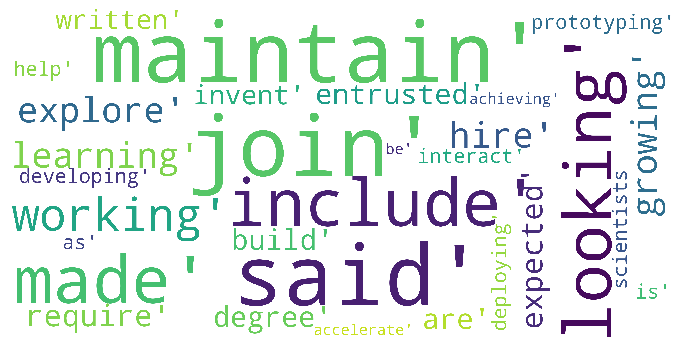

All Text Word Cloud


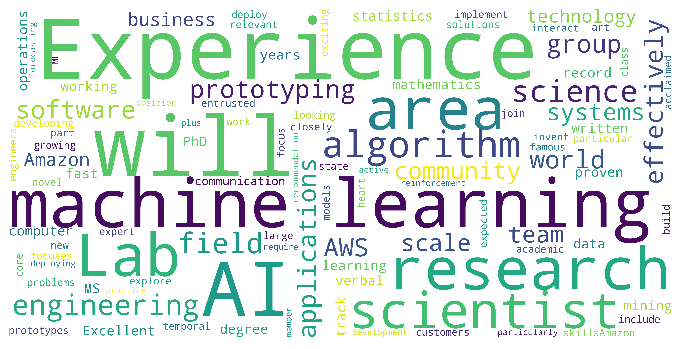

In [12]:
text = df.loc[1, 'verbs']
print('Verbs Word Cloud')
show_wordcloud(text)

text = df.loc[1, 'clean_text']
print('All Text Word Cloud')
show_wordcloud(text)

## Comparing Nouns to All Text

Nouns Word Cloud


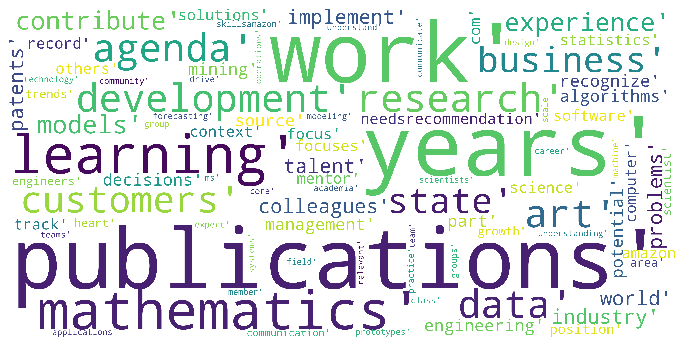

All Text Word Cloud


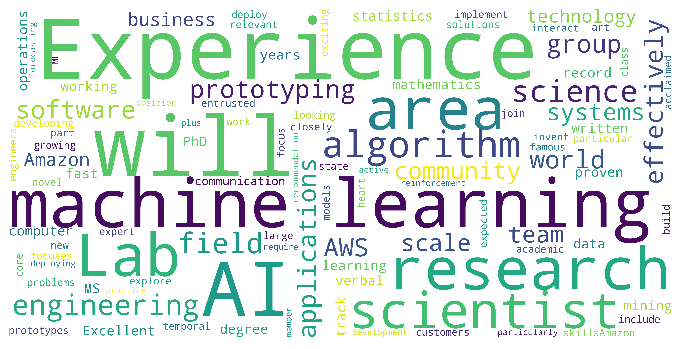

In [13]:
text = df.loc[1, 'nouns']
print('Nouns Word Cloud')
show_wordcloud(text)

text = df.loc[1, 'clean_text']
print('All Text Word Cloud')
show_wordcloud(text)

### Discussion:
Do we notice anything from the Verbs or Nouns Word Clouds that teaches us about nltk's `pos_tag` function?



# _n_-grams

The last Word Clouds showed us a different picture of what is important and unimportant. But as we know, words in the tech world are often combined with other words to make a phrase, which has more meaning to us. As such, the next phase is our EDA will be to look at word combinations or _n_-grams. 


An *n*-gram is a contiguous sequence of *n* items from a given sample of text or speech. They are a combination of words. 

In order to make our jobs easier for pulling _n_-grams, we will establish a function to do that (the next block of code). Notice that in this function, we are passing to Python two values - the text we want analyzed and the size of the _n_-gram (the number of words we want together). 

In [14]:
#Simple n-gramming function

def ngram_list(text, n_gram_size):
    from nltk import ngrams
    output = []
    grams = ngrams(text.split(), n_gram_size)
    for gram in grams:
        output.append(gram)
    return output


Let's look at an example of this before we apply it to our DataFrame text.

In [15]:
text = 'The gray fox jumped over the lazy dog.'

bigrams = ngram_list(text, 2)
trigrams = ngram_list(text, 3)
fourgrams = ngram_list(text, 4)

print(bigrams, '\n\n', trigrams, '\n\n', fourgrams)

[('The', 'gray'), ('gray', 'fox'), ('fox', 'jumped'), ('jumped', 'over'), ('over', 'the'), ('the', 'lazy'), ('lazy', 'dog.')] 

 [('The', 'gray', 'fox'), ('gray', 'fox', 'jumped'), ('fox', 'jumped', 'over'), ('jumped', 'over', 'the'), ('over', 'the', 'lazy'), ('the', 'lazy', 'dog.')] 

 [('The', 'gray', 'fox', 'jumped'), ('gray', 'fox', 'jumped', 'over'), ('fox', 'jumped', 'over', 'the'), ('jumped', 'over', 'the', 'lazy'), ('over', 'the', 'lazy', 'dog.')]


## Counting the Number of *n*-grams

Now that we understand what are _n_-grams, we will want to know how many of the same _n_-grams there are in a text (or corpus - the official title of a text document). 

To find the number of same _n_-grams in a text, we will use the `collections` library in Python and the `.Counter()` function in that library. 

Run this next block of code. It is currently using the sample text to analyze. Take a look at what it does. 

In [16]:
import collections

result = collections.Counter(bigrams)
print(result)


Counter({('The', 'gray'): 1, ('gray', 'fox'): 1, ('fox', 'jumped'): 1, ('jumped', 'over'): 1, ('over', 'the'): 1, ('the', 'lazy'): 1, ('lazy', 'dog.'): 1})


## count_ngrams( ) function

To make our coding job easier, we will establish a function that we can repeatedly use for analysis. This function gives Python two values (the text we want analyzed and the size of the _n_-grams). Python will return to us a dictionary of the _n_-grams that it found and the number of times that _n_-gram appears our text. We will later use this function on every job announcement text and we will store this information for later use in our DataFrame. 

In [17]:
def count_ngrams(text, n_gram_size):
    from nltk import ngrams
    import collections
    
    output = []
    grams = ngrams(text.split(), n_gram_size)
    
    for gram in grams:
        output.append(gram)

    result = collections.Counter(output)
    return result
    

In order to get the most accurate information, we want to now run this function against our text. But not just any text. We want to run it against the text that is cleaned of stop words. We saved our stop word cleaned text in our DataFrame under the column `no_stop_text`. Thus, we will be calling on that column of text and running the _n_-gram counting function. 

Let's do that in this next block. 

In [31]:
text = []

for announcement in df['no_stop_text']:
    text.append(announcement)

text = str(text)

print(count_ngrams(text, 2))

Counter({('machine', 'learning'): 77, ('such', 'as'): 51, ('you', 'will'): 48, ('data', 'science'): 38, ('machine', 'learning,'): 31, ('computer', 'science,'): 30, ('will', 'be'): 28, ('years', 'experience'): 27, ('we', 'are'): 27, ('as', 'well'): 25, ('our', 'people'): 25, ('well', 'as'): 23, ('data', 'scientist'): 23, ('more', 'about'): 22, ('natural', 'language'): 20, ('learn', 'more'): 20, ('every', 'day.'): 17, ('least', 'one'): 17, ('learning', 'models'): 15, ('related', 'field'): 15, ('hands-on', 'experience'): 15, ('advanced', 'degree'): 15, ('we', 'offer'): 15, ('experience', 'building'): 14, ('statistical', 'analysis'): 14, ('we', 'believe'): 14, ('written', 'verbal'): 13, ('2+', 'years'): 13, ('be', 'responsible'): 13, ('choices', 'that'): 13, ('skills', 'ability'): 13, ('degree', 'computer'): 12, ('years', 'relevant'): 12, ('will', 'have'): 12, ('data', 'science,'): 12, ('impact', 'on'): 12, ('based', 'on'): 12, ('professional', 'development'): 12, ('deep', 'learning'): 12,

As we can see from our output, there is a lot of good information, but there is also a considerable amount of garbage still in our text. In the next block, clean up the text and let's run this again. 

In [32]:
text = text.replace('.', '')
text = text.replace(',', '')
text = text.replace('&amp;', '')
text = text.replace('<p>', '')
text = text.replace('\\n', ' ')
text = text.replace('-', ' ')
text = text.replace('#li-jy1', '')

output = (count_ngrams(text, 2))

print(output.most_common(10))

[(('machine', 'learning'), 113), (('data', 'science'), 51), (('such', 'as'), 51), (('you', 'will'), 48), (('computer', 'science'), 35), (('years', 'experience'), 28), (('will', 'be'), 28), (('we', 'are'), 27), (('data', 'scientist'), 27), (('as', 'well'), 26)]


## A function to help us prep the text for ngram counting

In [39]:
def basic_ngram_charting_prep(text):
    import re
    import unicodedata
    import nltk
    from nltk.corpus import stopwords

    # add appropriate words that will be ignored in the analysis
    ADDITIONAL_STOPWORDS = ['covfefe', '-']

    import matplotlib.pyplot as plt
    %matplotlib inline
    
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    
    words = re.sub(r'[^\w\s]', '', text).split()
    
    output = [word for word in words if word not in stopwords]
    
    return output

In [40]:
# words = basic_ngram_charting_prep(''.join(str(df['no_stop_text'].tolist())))

# words = [word for word in df['token_text']]

words[:15]

['pinterestmillions',
 'people',
 'across',
 'world',
 'come',
 'pinterest',
 'find',
 'new',
 'ideas',
 'every',
 'day',
 'get',
 'inspiration',
 'dream',
 'new']

In [24]:
a = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:25]

a

(machine, learning)        80
(data, science)            36
(years, experience)        33
(Machine, Learning)        31
(Computer, Science)        29
(communication, skills)    24
(Data, Scientist)          20
(every, day)               18
(related, field)           18
(deep, learning)           17
(least, one)               17
(2, years)                 17
(statistical, analysis)    16
(Data, Science)            16
(data, analytics)          16
(learning, models)         15
(We, offer)                15
(3, years)                 14
(5, years)                 14
(handson, experience)      14
(sexual, orientation)      13
(skills, ability)          13
(design, development)      13
(national, origin)         13
(data, generate)           12
dtype: int64

In [25]:
b = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:25]

b

(machine, learning, models)                   14
(best, work, every)                           12
(Experience, use, cases)                      12
(data, generate, insights)                    12
(work, every, day)                            12
(Computer, Science, Statistics)               10
(amp, Cognitive, team)                        10
(Analytics, amp, Cognitive)                   10
(written, verbal, communication)              10
(Excellent, written, verbal)                   9
(Equal, OpportunityAffirmative, Action)        9
(machine, learning, deep)                      9
(2, years, experience)                         9
(learning, deep, learning)                     9
(OpportunityAffirmative, Action, Employer)     8
(6, years, relevant)                           8
(verbal, communication, skills)                8
(degree, Computer, Science)                    8
(experience, machine, learning)                8
(structured, unstructured, data)               7
(Disability, Veteran

## Eye-candy Time

In [26]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

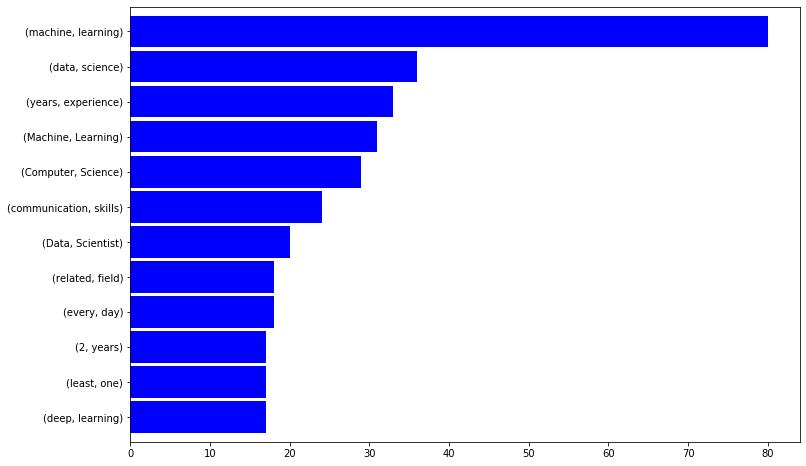

In [27]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

Text(0.5, 0, '# of Occurances')

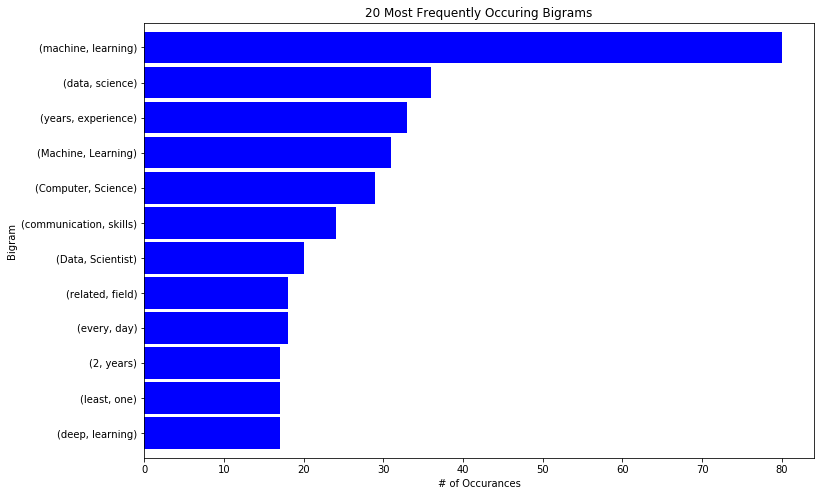

In [28]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

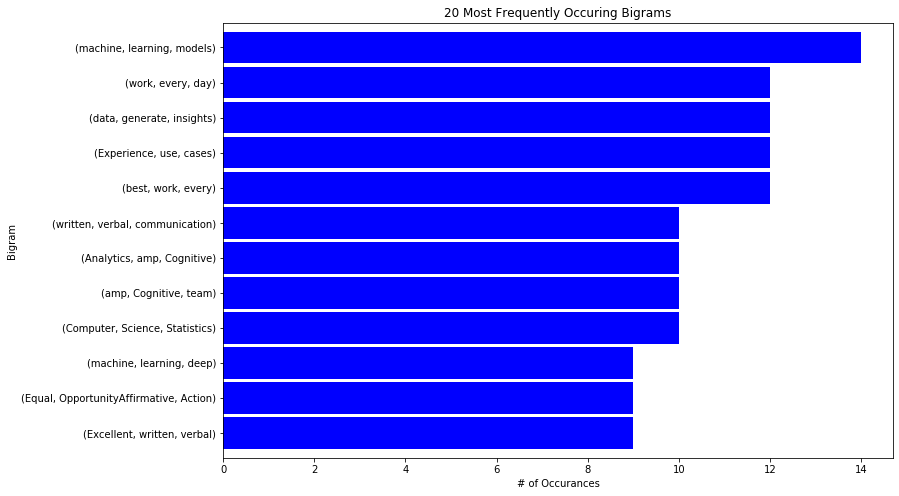

In [29]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

# Ngrams through NLTK

[https://nbviewer.jupyter.org/github/sgsinclair/alta/blob/master/ipynb/RepeatingPhrases.ipynb]

In [30]:
import nltk
nltk.download('gutenberg')

emmaTokens = list(nltk.corpus.gutenberg.words("austen-emma.txt")) # note the use of words() to load tokens
emmaWords = [word for word in emmaTokens if word[0].isalpha()] # filter out non-words
print(emmaWords[:25])

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/benmeredith/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['Emma', 'by', 'Jane', 'Austen', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some']


There's actually a very easy and convenient way to look for the top bigrams in an NLTK text using the collocations() function and specifying the number of top frequency phrases to return.

In [16]:
from nltk.collocations import *

emmaText = nltk.Text(emmaWords)
type(emmaText)
# emmaText.collocations(20) # 20 top bigrams separated by semi-colon

nltk.text.Text